In [33]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [34]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import mpl_toolkits.mplot3d.axes3d as p3

In [35]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [36]:
%matplotlib inline

# Data

In [37]:
# Read data
motion_10 = np.genfromtxt('../dataset2/motion_10.csv', delimiter=',')
print("Motion 1.0 data has a length of ", len(motion_10))

Motion 1.0 data has a length of  97939


## Visualizations

In [38]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    #print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [39]:
def get_specific_cmd(dataset, fwd, side, rot):
    return np.where(np.logical_and(dataset[:, 2] == fwd, 
                                   dataset[:, 3] == side, 
                                   dataset[:, 4] == rot))[0]

In [40]:
def get_swinging_motions(dataset, height=-0.3):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 34] < height)[0]
    fl_min_height = np.where(dataset[:, 37] < height)[0]
    rr_min_height = np.where(dataset[:, 40] < height)[0]
    rl_min_height = np.where(dataset[:, 43] < height)[0]
            
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## Motion_10

In [41]:
velocity = 1.00953

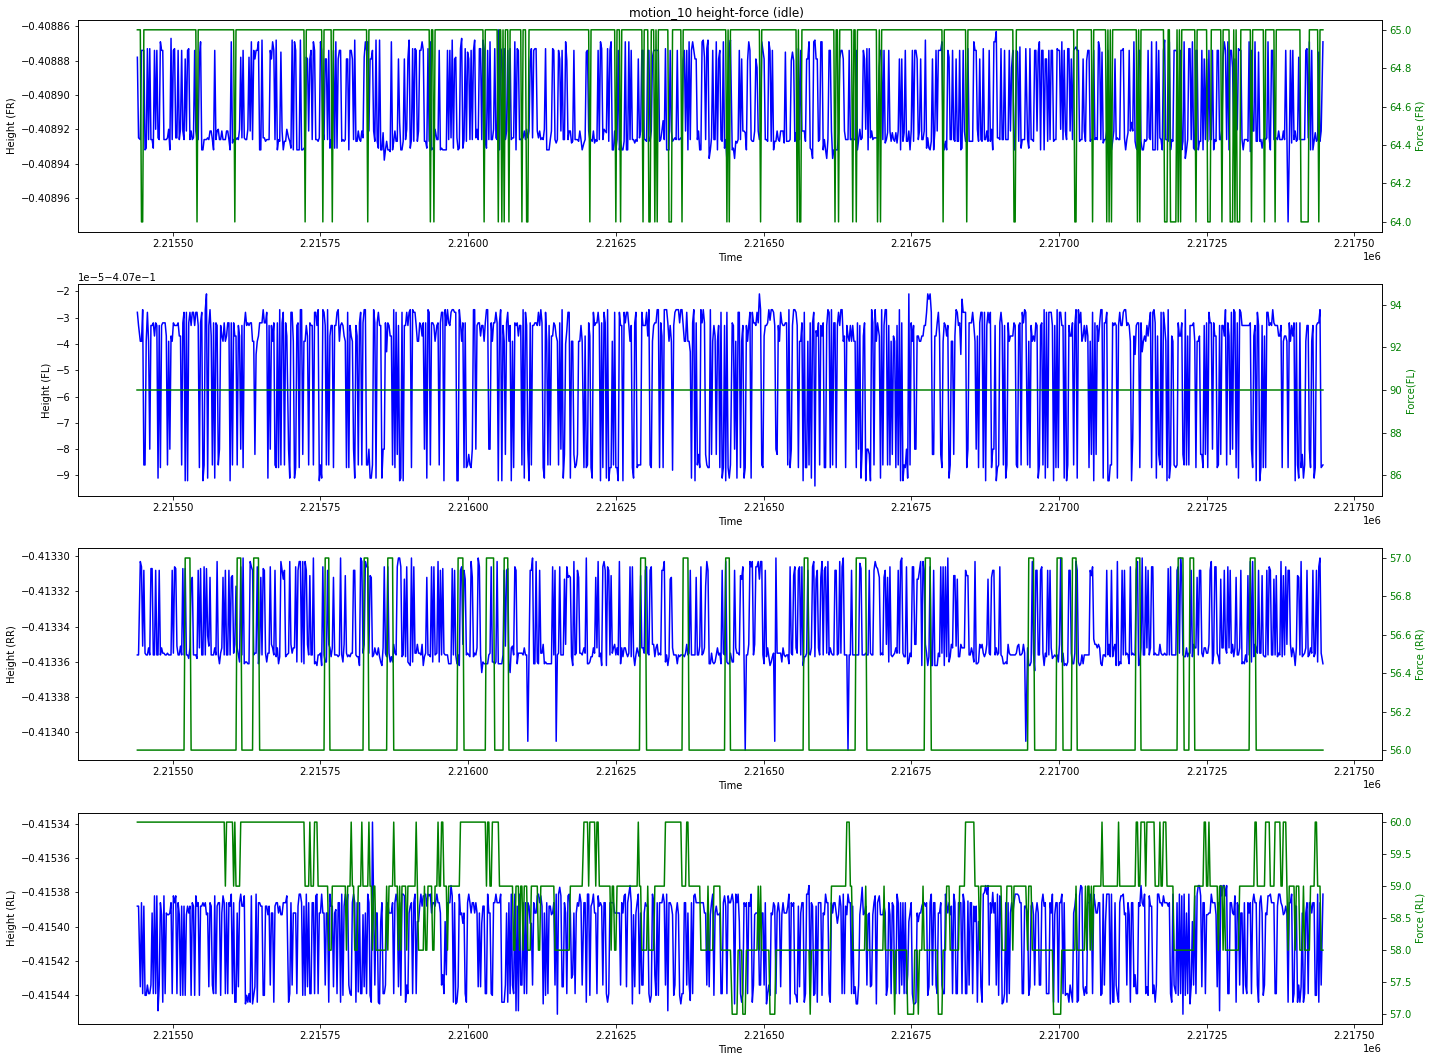

In [42]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_10)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_10 height-force (idle)",
                      motion_10,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

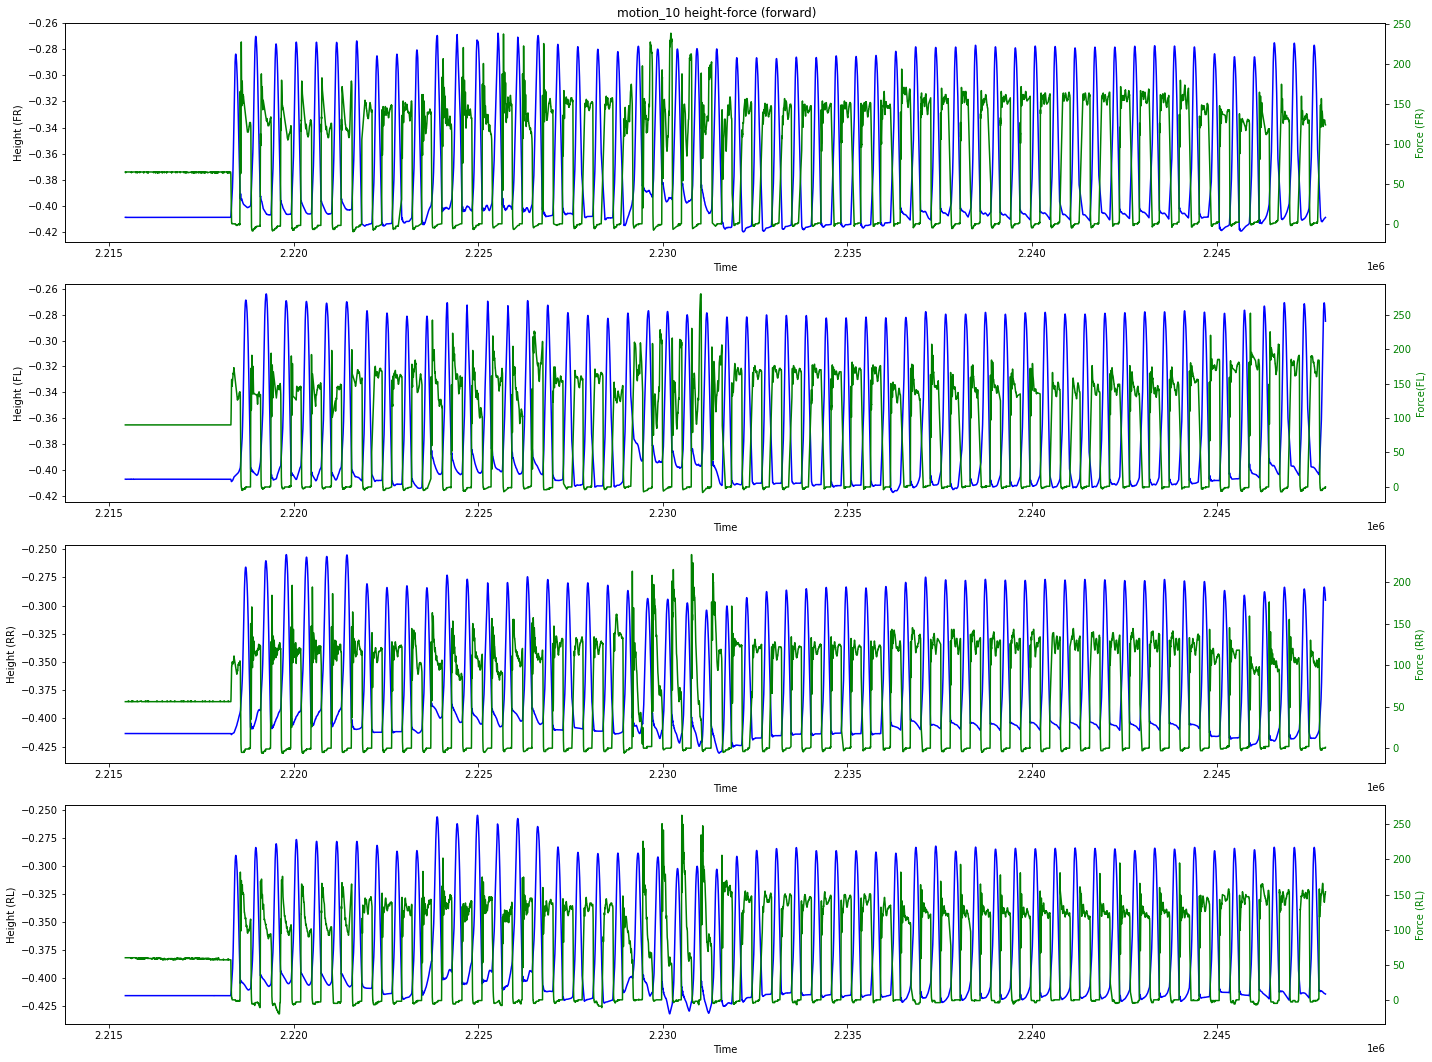

In [43]:
# Forward
fwd_cmds = get_specific_cmd(motion_10, velocity, 0, 0)
motion_10_fwd = motion_10[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_10_fwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_10 height-force (forward)",
                      motion_10,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

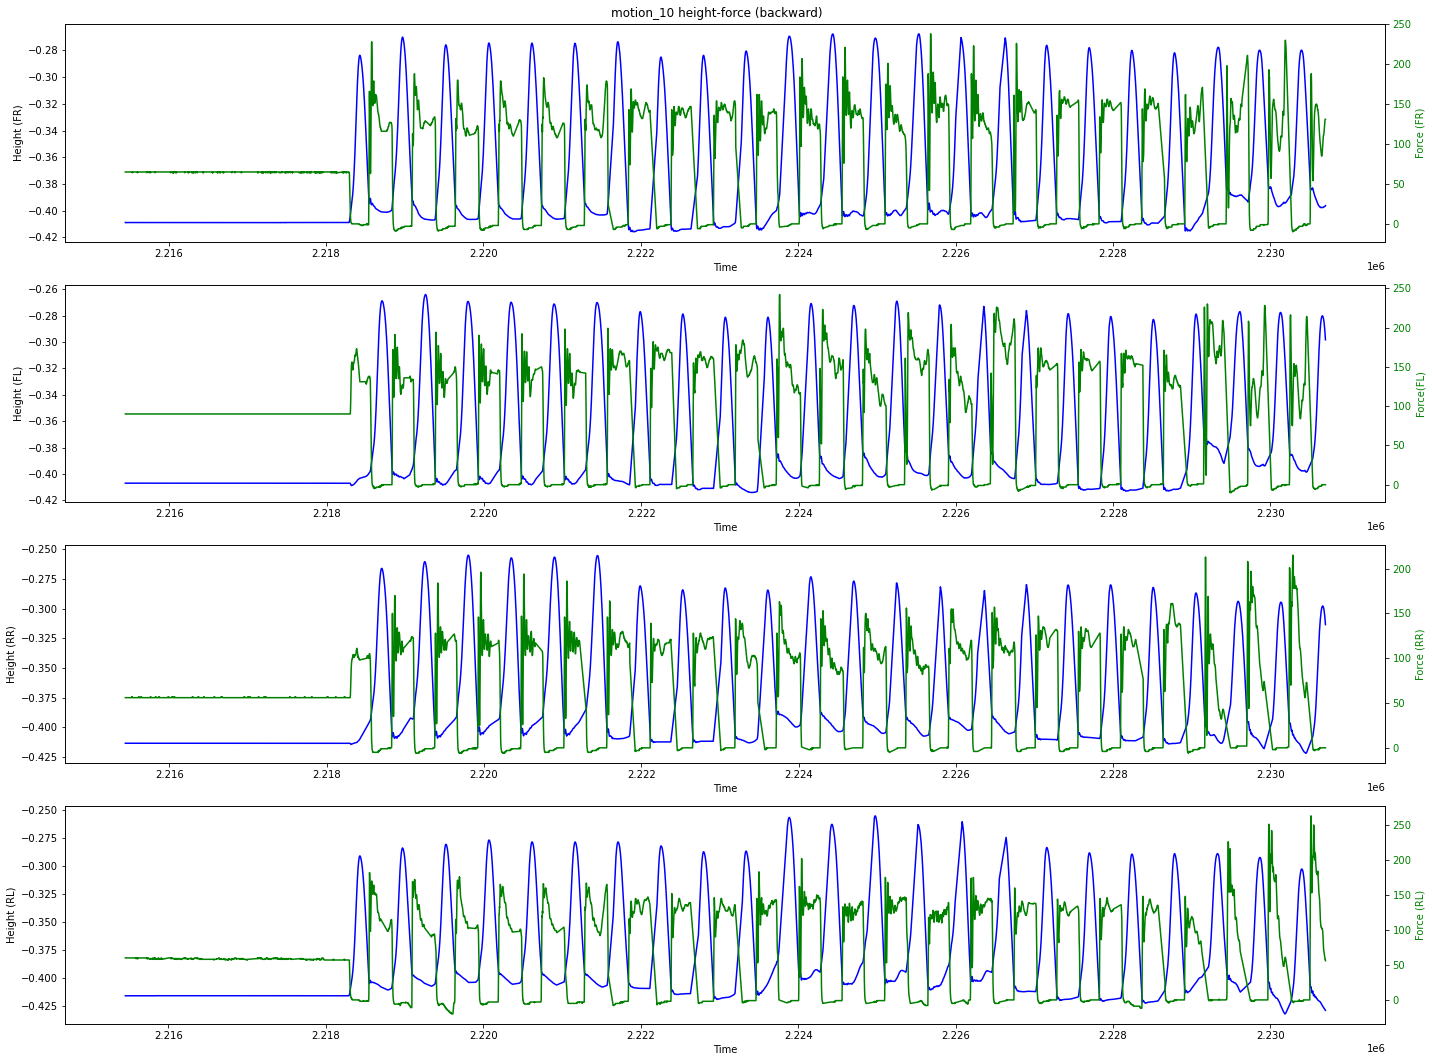

In [44]:
# Backwards
bwd_cmds = get_specific_cmd(motion_10, -velocity, 0, 0)
motion_10_bwd = motion_10[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_10_bwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_10 height-force (backward)",
                      motion_10,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

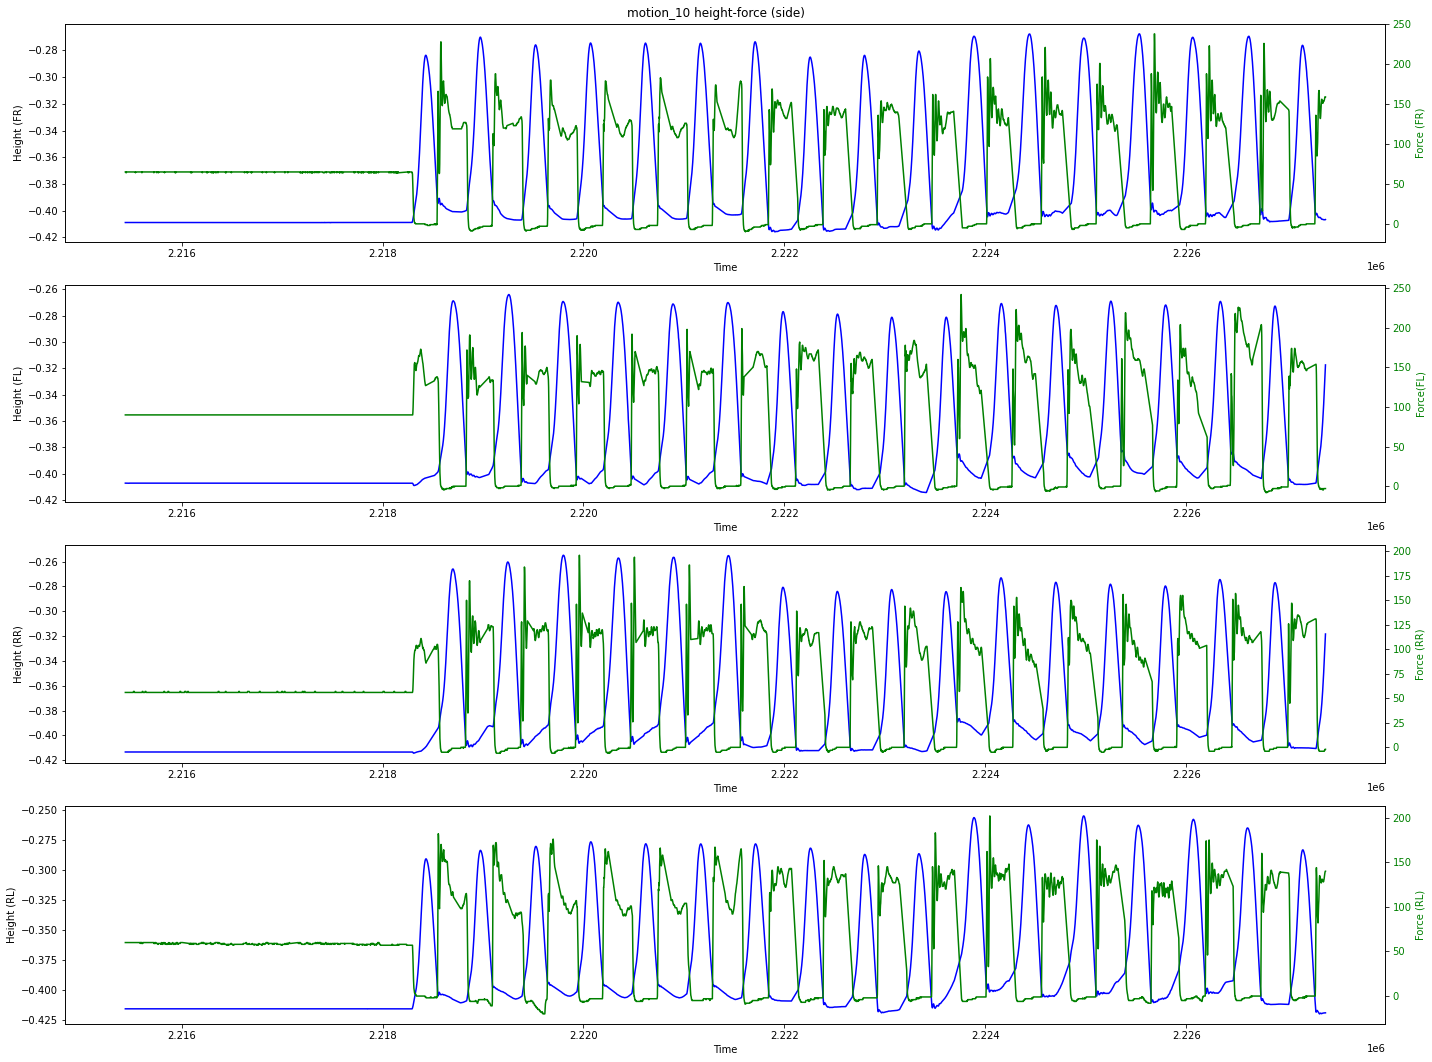

In [45]:
# Side (right)
side_cmds = get_specific_cmd(motion_10, 0, velocity, 0)
motion_10_side = motion_10[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_10_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_10 height-force (side)",
                      motion_10,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

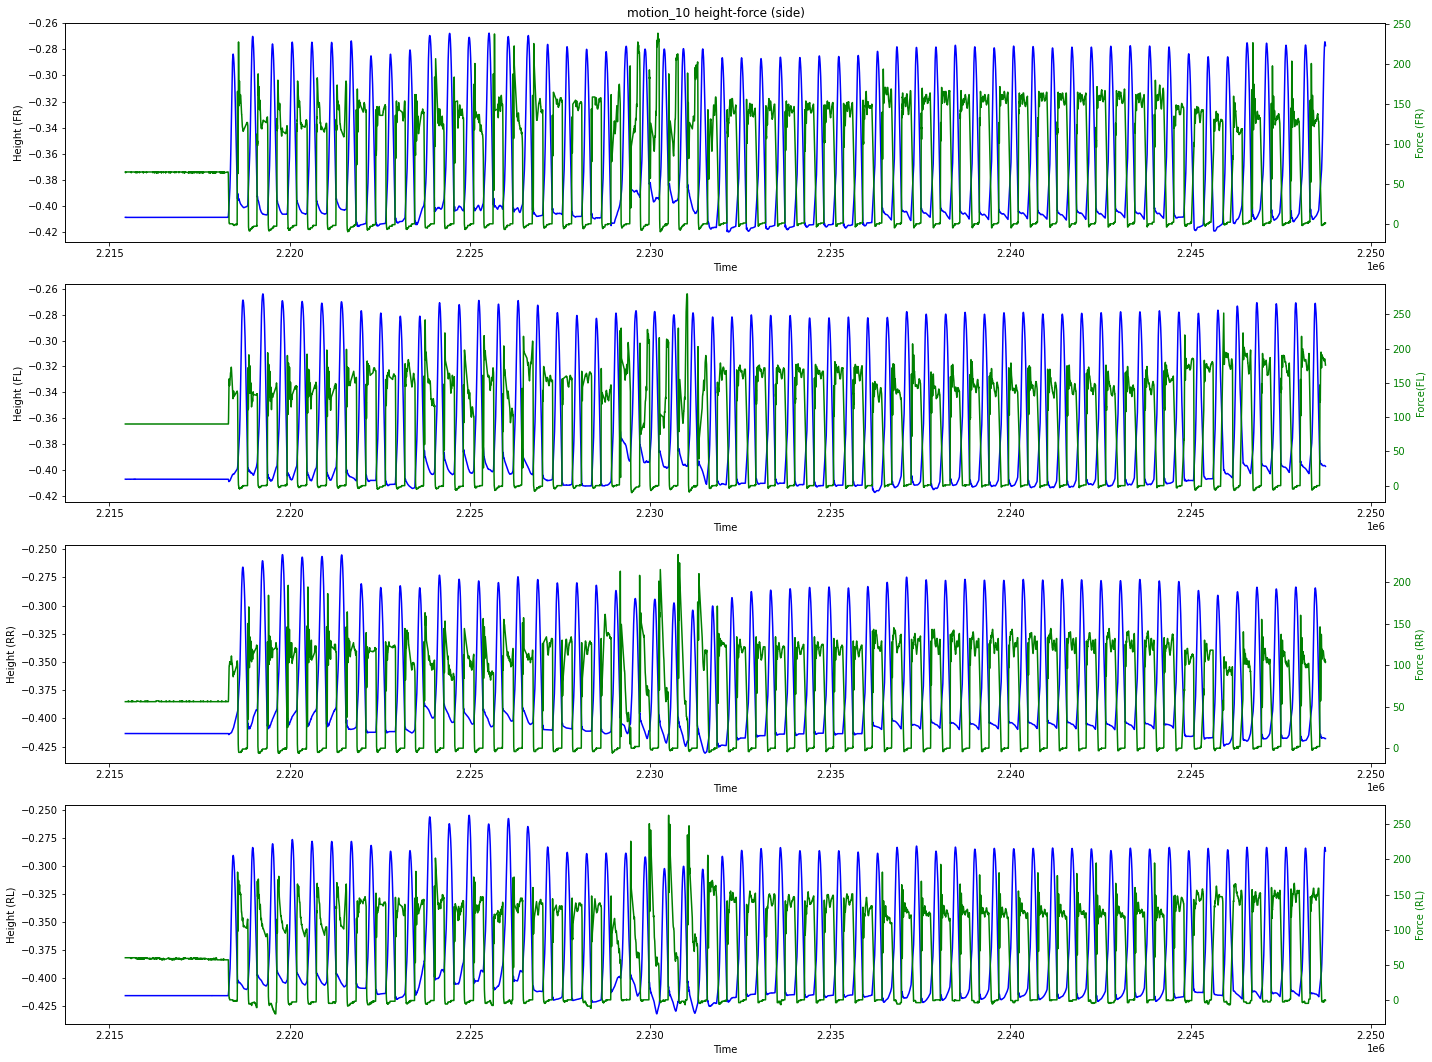

In [46]:
# Side (left)
side_cmds = get_specific_cmd(motion_10, 0, -velocity, 0)
motion_10_side = motion_10[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_10_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_10 height-force (side)",
                      motion_10,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

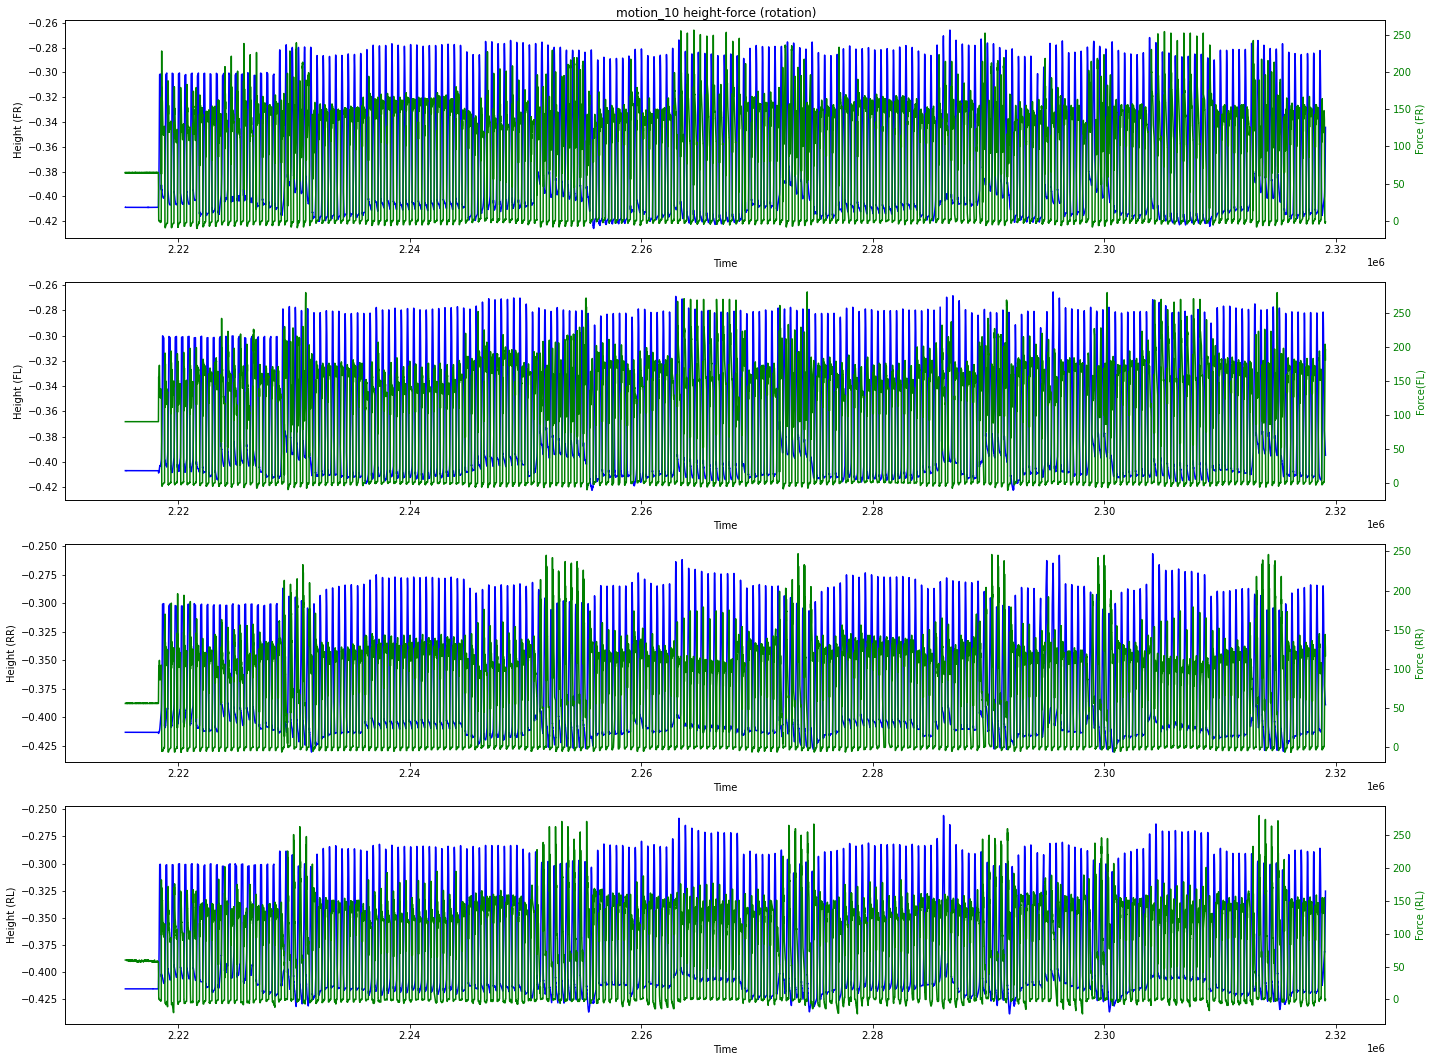

In [47]:
# Rotation (clockwise)
rot_cmds = get_specific_cmd(motion_10, 0, 0, velocity)
motion_10_rot = motion_10[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_10_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_10 height-force (rotation)",
                      motion_10,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

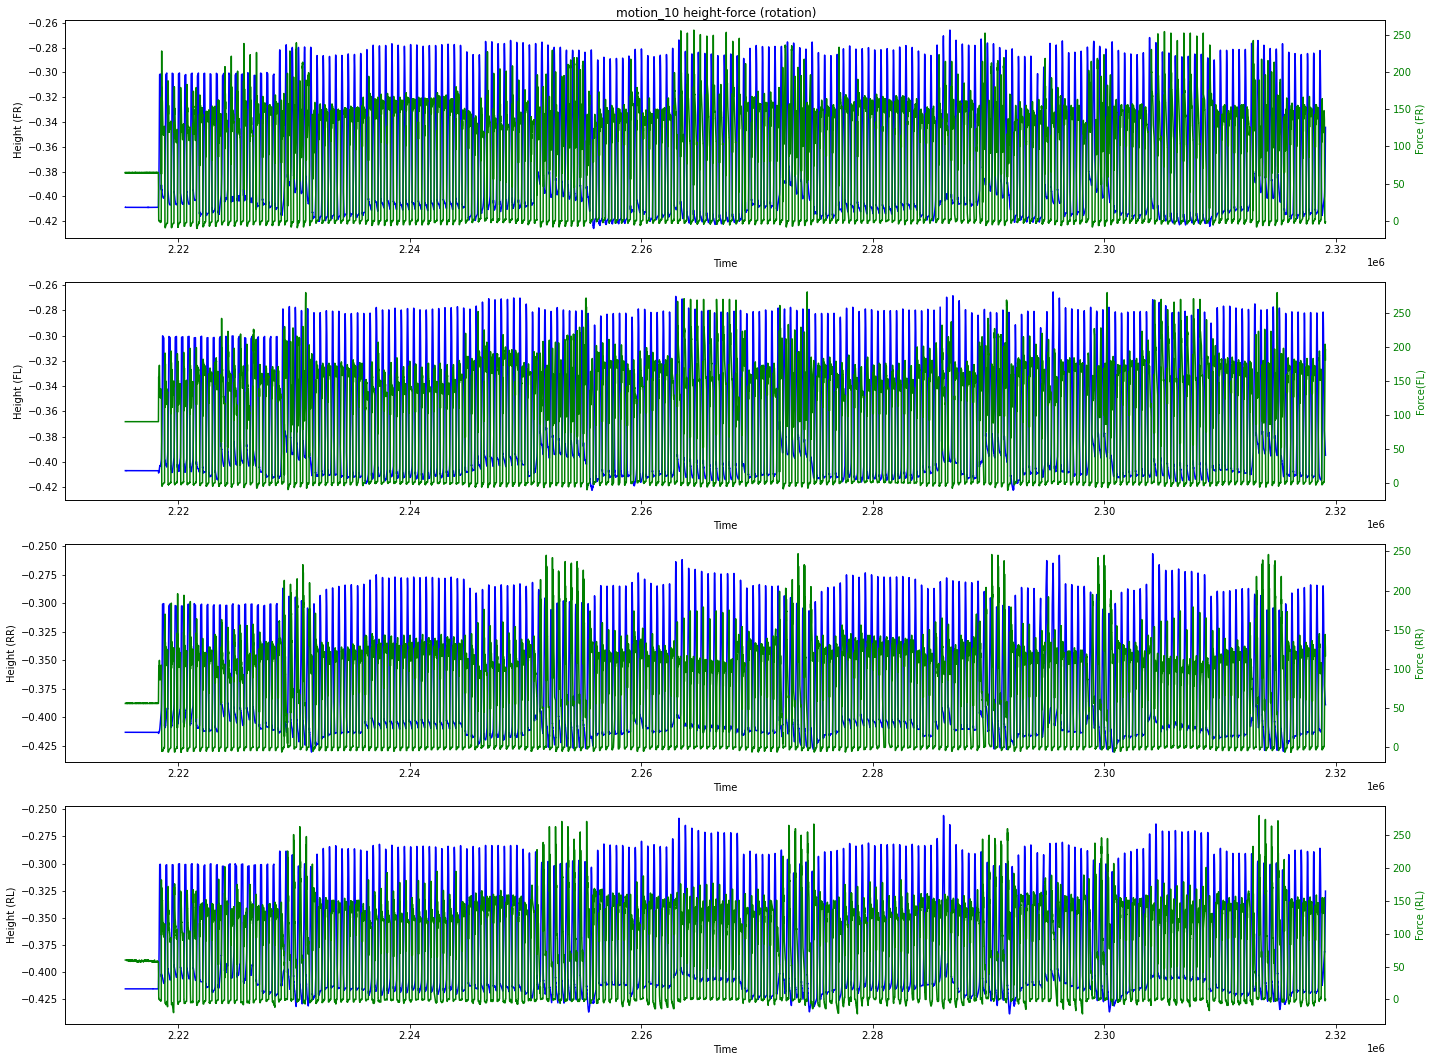

In [48]:
# Rotation (counter clockwise)
rot_cmds = get_specific_cmd(motion_10, 0, 0, -velocity)
motion_10_rot = motion_10[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_10_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_10 height-force (rotation)",
                      motion_10,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Footsteps Extraction (Height + Force)

In [49]:
def extract_footsteps(dataset, height_threshold=0.1, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 34] - dataset[:, 37]), 9)

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 40] - dataset[:, 43]), 9)

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between front and rear feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Footsteps that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with motion commands: ", footsteps_due_to_motion, "\n")
    
    # Footsteps that belong to idle mode
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with no motion commands: ", footsteps_due_to_stationarity, "\n")
    
    # FR min height (i.e swining motion)
    rear_force_footsteps = np.where(np.logical_and(dataset[:, 58] > force_thresholds[0], 
                                                   dataset[:, 59] > force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_and(dataset[:, 56] > force_thresholds[2], 
                                                    dataset[:, 57] > force_thresholds[3]))[0]

    # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to motion: ", footsteps_due_to_motion, "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to no motion: ", footsteps_due_to_stationarity, "\n")
    
    return force_height_footsteps

def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, dataset[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(dataset[footstep_sort, 0] - dataset[footsteps_sort[idx-1], 0]) < 9:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)

## Footsteps

In [50]:
def footstep_extraction_and_plotting(dataset, velocities, height_threshold, force_thresholds, indexes):
    # Extract backward motion entries
    cmds = get_specific_cmd(dataset, velocities[0], velocities[1], velocities[2])
    motion_10_cmds = motion_10[cmds]
    fr_min_height, fl_min_height, rr_min_height, rl_min_height = get_swinging_motions(motion_10_cmds)
    print("Foot swinging motions lenghts: ", len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    # Extract footsteps
    footsteps = extract_footsteps(motion_10_cmds, height_threshold, force_thresholds)
    print("Footsteps extracted: ", len(footsteps))
    
    # Footsteps NMS
    footsteps_after_nms = footsteps_nms(motion_10_cmds, footsteps)
    print("Footsteps after non-maximum-suppression: ", len(footsteps_after_nms))
    
    # Plot footsteps
    sample_walking_fr_height = fr_min_height[indexes]
    sample_walking_fl_height = fl_min_height[indexes]
    sample_walking_rr_height = rr_min_height[indexes]
    sample_walking_rl_height = rl_min_height[indexes]

    plot_overlapping_data("Footsteps",
                          motion_10_cmds,
                          [sample_walking_fr_height, 
                           sample_walking_fl_height, 
                           sample_walking_rr_height,
                           sample_walking_rl_height],
                           [34, 56, 37, 57, 40, 58, 43, 59],
                           True,
                           motion_10_cmds[footsteps_nms(motion_10_cmds, footsteps), 0])
    
    return motion_10_cmds, footsteps_after_nms

### Forward motion

Foot swinging motions lenghts:  13718 13744 15106 15302
Min and max diff between front and rear feet 0.00067 0.265254 

Amount of footsteps found with height criteria:  6852 

Intersection with motion commands:  6852 

Intersection with no motion commands:  0 

Number of force footsteps:  528 

Number of height-force footsteps:  528 

Number of footsteps extracted with height-force due to motion:  528 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  528
Footsteps after non-maximum-suppression:  98


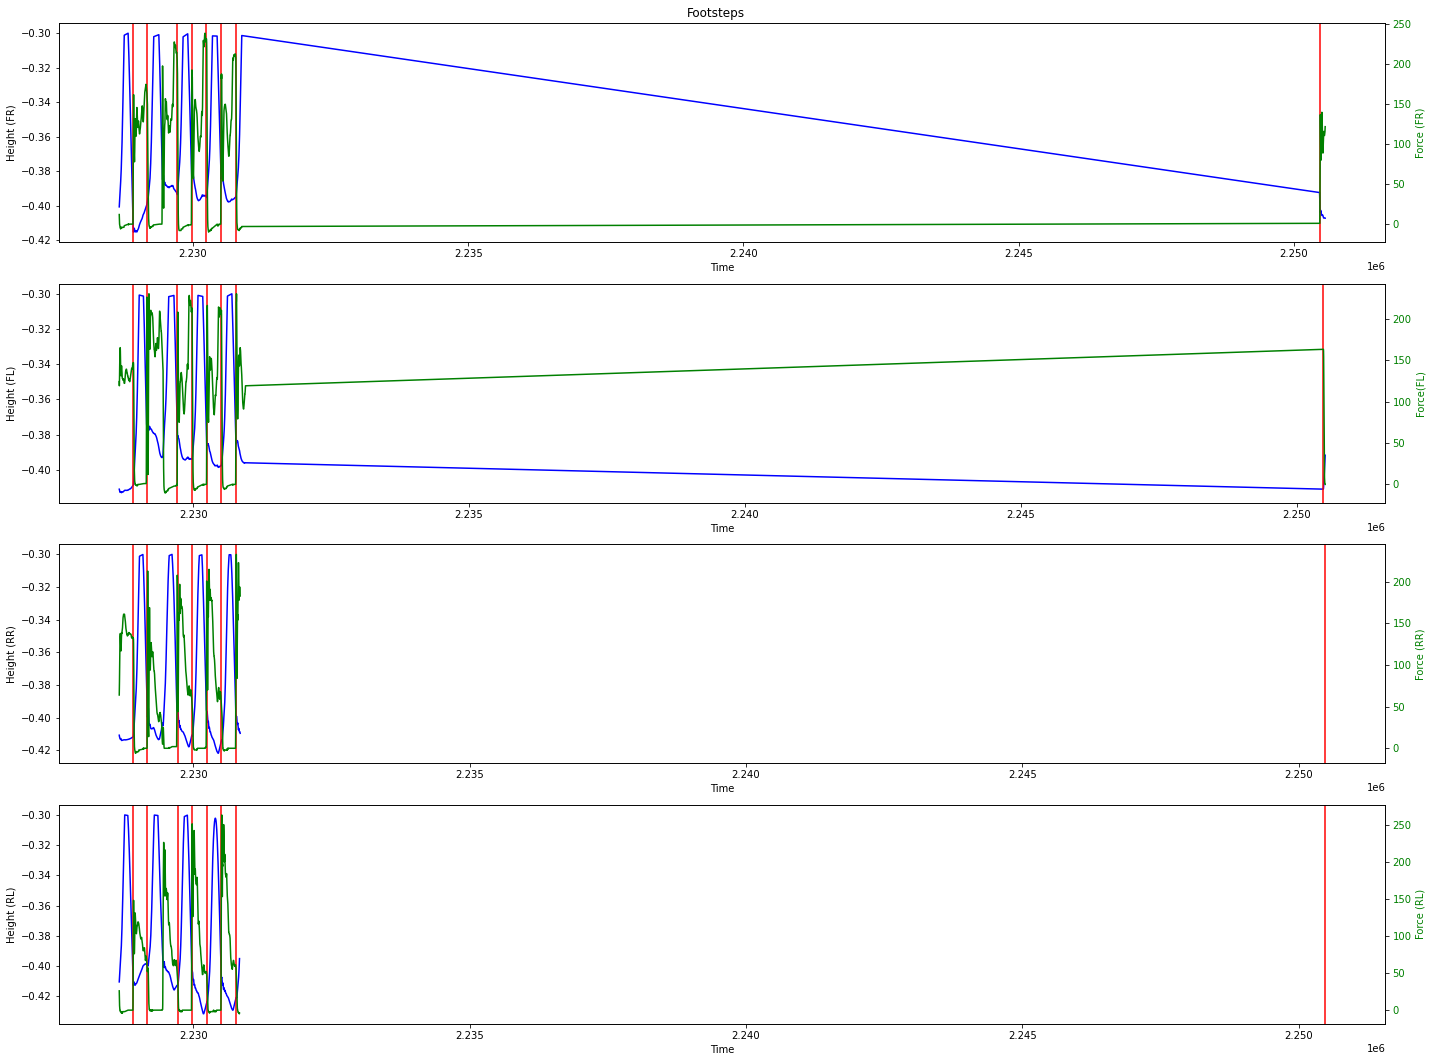

In [64]:
motion_10_fwd, footsteps_10_fwd = footstep_extraction_and_plotting(dataset=motion_10, velocities=[velocity, 0, 0], height_threshold=0.1, force_thresholds=[40,40,40,40], indexes=range(0, 1000))

### Backward motion

Foot swinging motions lenghts:  6661 6587 6406 6436
Min and max diff between front and rear feet 0.000741 0.284275 

Amount of footsteps found with height criteria:  3040 

Intersection with motion commands:  3040 

Intersection with no motion commands:  0 

Number of force footsteps:  180 

Number of height-force footsteps:  180 

Number of footsteps extracted with height-force due to motion:  180 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  180
Footsteps after non-maximum-suppression:  53


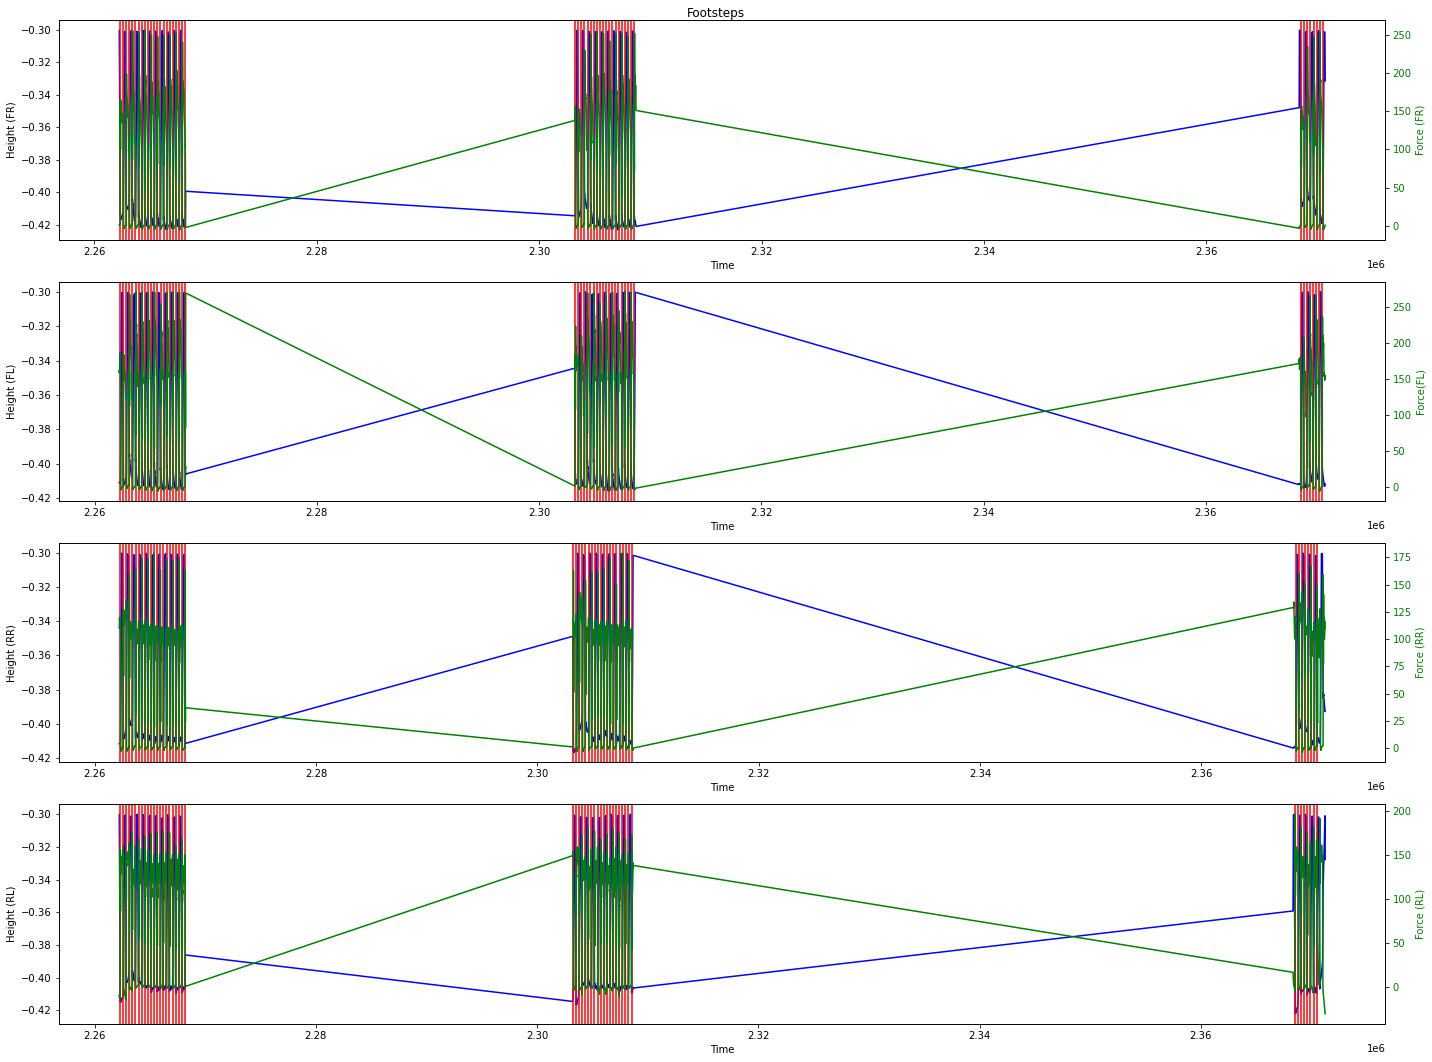

In [52]:
motion_10_bwd, footsteps_10_bwd = footstep_extraction_and_plotting(dataset=motion_10, velocities=[-velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Side motion (right)

Foot swinging motions lenghts:  5093 5028 5199 5235
Min and max diff between front and rear feet 0.000364 0.271529 

Amount of footsteps found with height criteria:  2403 

Intersection with motion commands:  2403 

Intersection with no motion commands:  0 

Number of force footsteps:  169 

Number of height-force footsteps:  169 

Number of footsteps extracted with height-force due to motion:  169 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  169
Footsteps after non-maximum-suppression:  45


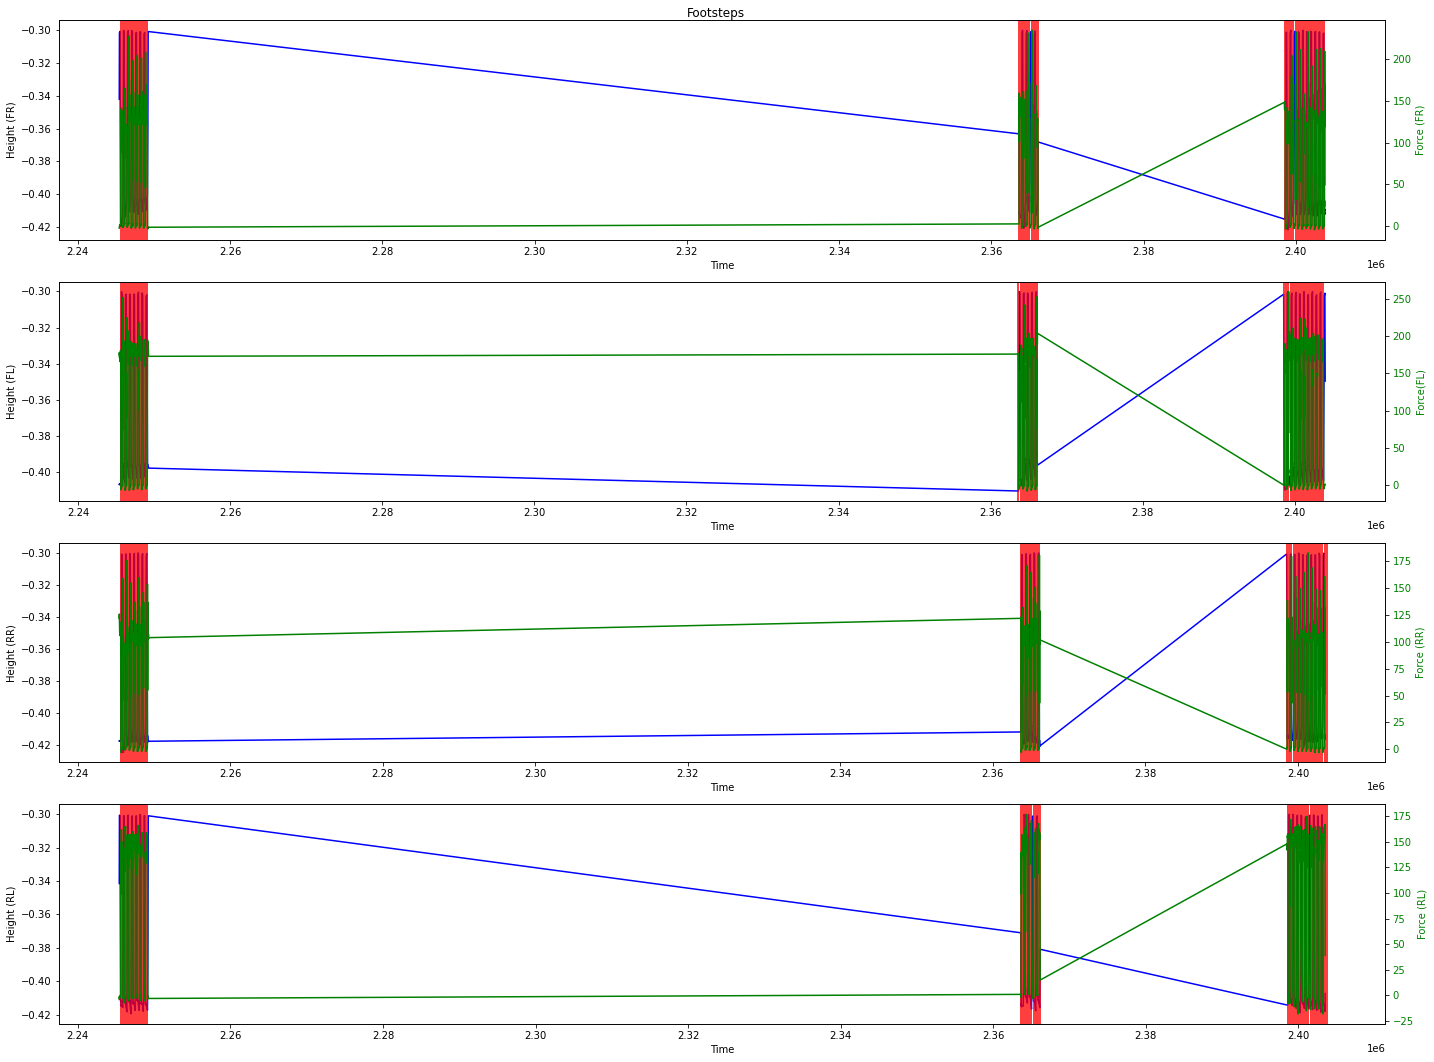

In [54]:
motion_10_side_right, footsteps_10_side_right = footstep_extraction_and_plotting(dataset=motion_10, velocities=[0, velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 5000))

### Side (left)

Foot swinging motions lenghts:  14319 14161 14206 14560
Min and max diff between front and rear feet 0.00051 0.27054 

Amount of footsteps found with height criteria:  6613 

Intersection with motion commands:  6613 

Intersection with no motion commands:  0 

Number of force footsteps:  530 

Number of height-force footsteps:  530 

Number of footsteps extracted with height-force due to motion:  530 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  530
Footsteps after non-maximum-suppression:  123


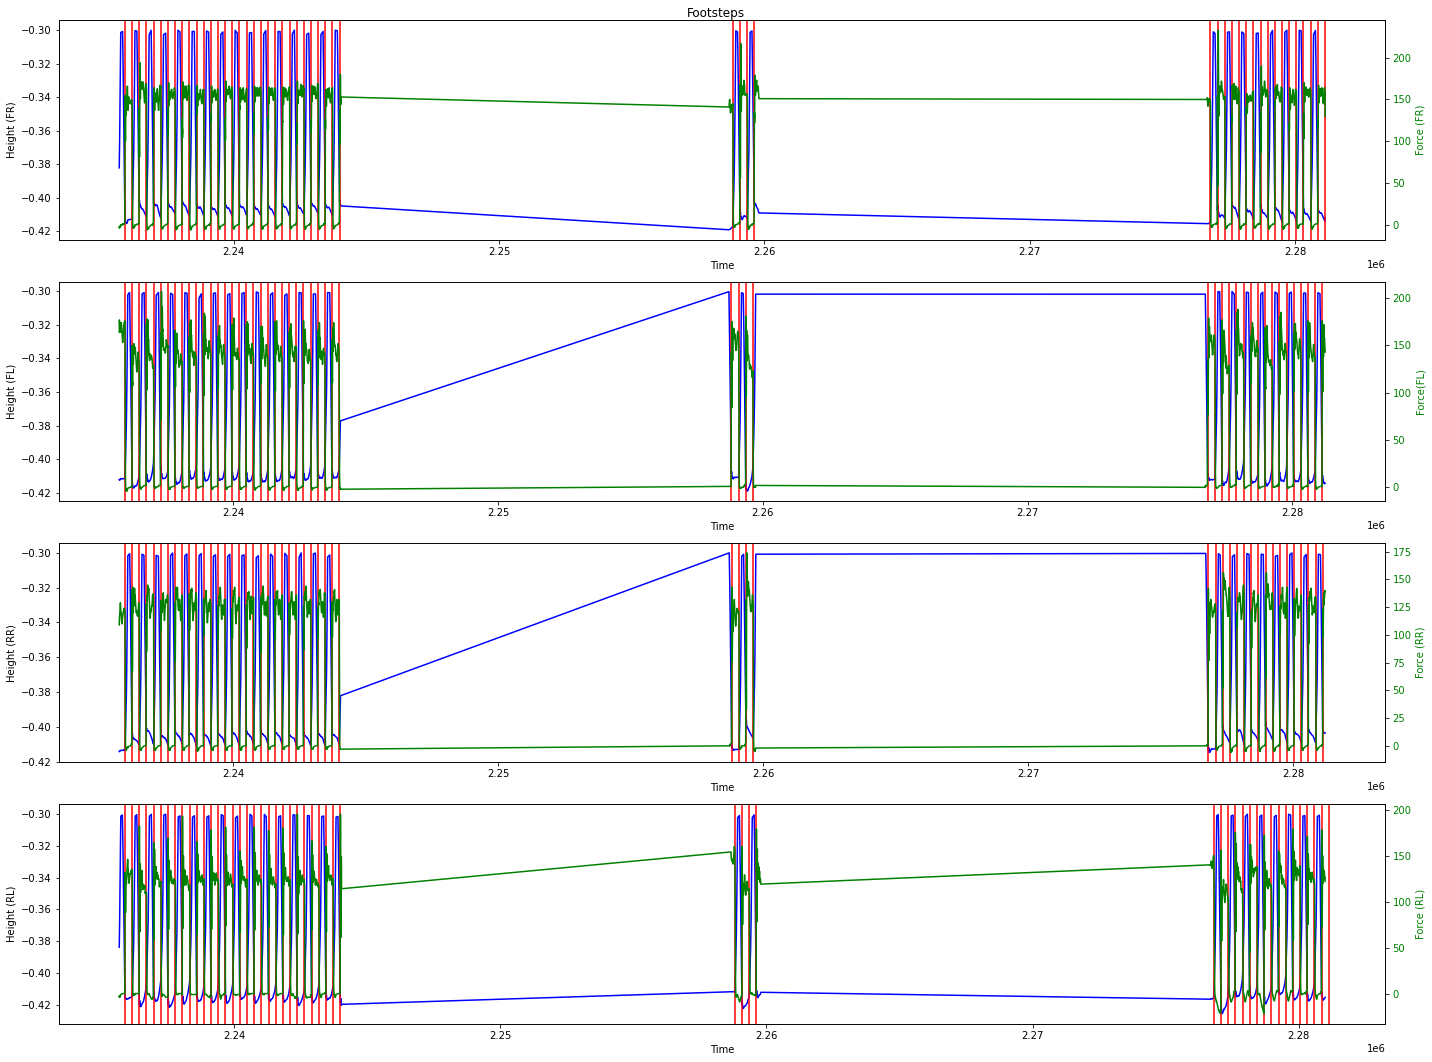

In [55]:
motion_10_side_left, footsteps_10_side_left = footstep_extraction_and_plotting(dataset=motion_10, velocities=[0, -velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Rotation (clockwise)

Foot swinging motions lenghts:  44823 44646 45840 45969
Min and max diff between front and rear feet 0.000113 0.285491 

Amount of footsteps found with height criteria:  21861 

Intersection with motion commands:  4023 

Intersection with no motion commands:  17838 

Number of force footsteps:  1117 

Number of height-force footsteps:  1117 

Number of footsteps extracted with height-force due to motion:  211 

Number of footsteps extracted with height-force due to no motion:  906 

Footsteps extracted:  1117
Footsteps after non-maximum-suppression:  334


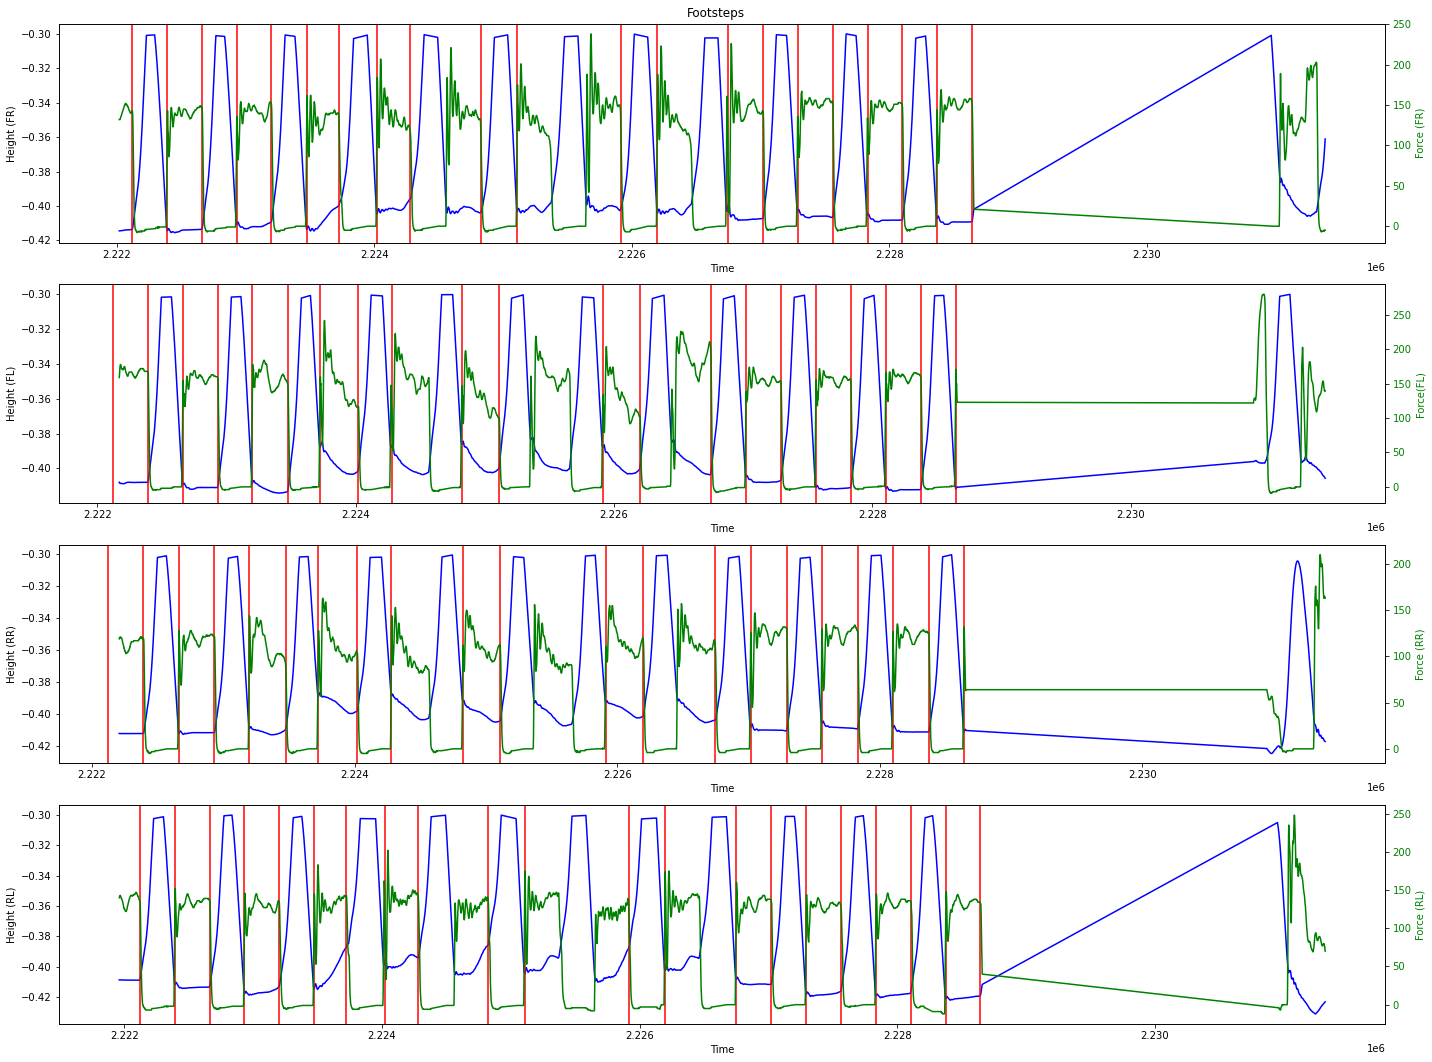

In [56]:
motion_10_clock, footsteps_10_clock = footstep_extraction_and_plotting(dataset=motion_10, velocities=[0, 0, velocity], height_threshold=0.1, force_thresholds=[90,90,90,90], indexes=range(3000, 6000))

### Rotation (counter clockwise)

Foot swinging motions lenghts:  44823 44646 45840 45969
Min and max diff between front and rear feet 0.000113 0.285491 

Amount of footsteps found with height criteria:  21861 

Intersection with motion commands:  4023 

Intersection with no motion commands:  17838 

Number of force footsteps:  1388 

Number of height-force footsteps:  1388 

Number of footsteps extracted with height-force due to motion:  282 

Number of footsteps extracted with height-force due to no motion:  1106 

Footsteps extracted:  1388
Footsteps after non-maximum-suppression:  342


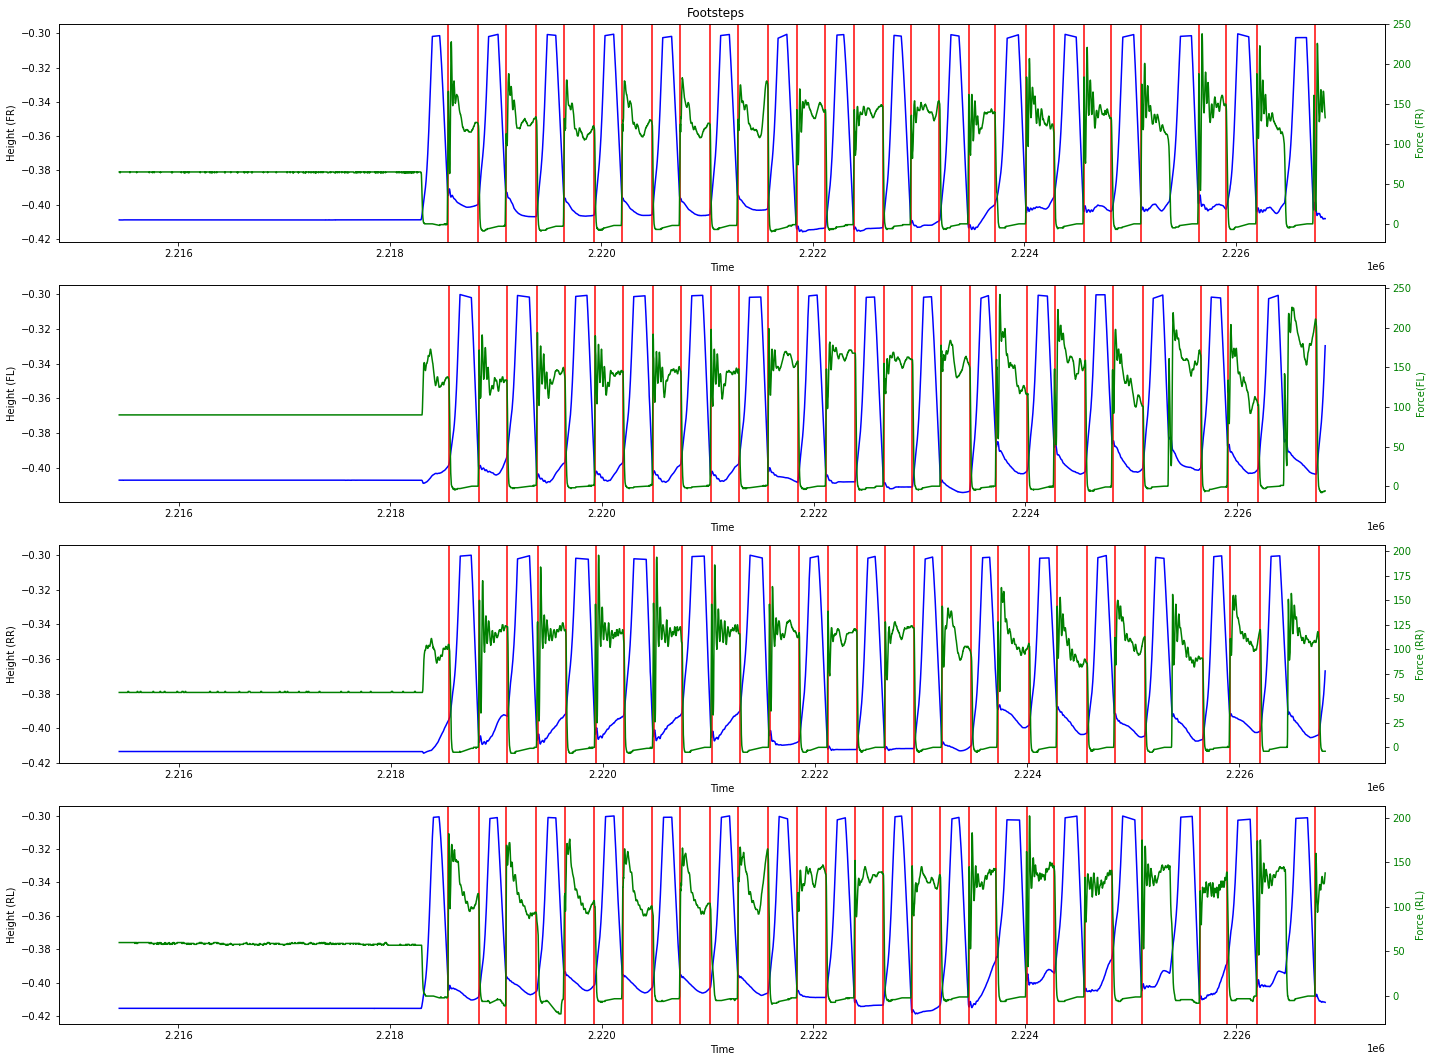

In [57]:
motion_10_count, footsteps_10_count = footstep_extraction_and_plotting(dataset=motion_10, velocities=[0, 0, -velocity], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 5000))

### Step size

In [58]:
def get_step_size(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Compute adjacent diff w.r.t to x coord.
    adj_diff_fr = np.diff(dataset[footsteps, idx_coord[0]])
    adj_diff_fl = np.diff(dataset[footsteps, idx_coord[1]])
    adj_diff_rr = np.diff(dataset[footsteps, idx_coord[2]])
    adj_diff_rl = np.diff(dataset[footsteps, idx_coord[3]])

    # Compute step size
    step_size_fr = adj_diff_fr[np.where(adj_diff_fr > 0)[0]]
    step_size_fl = adj_diff_fl[np.where(adj_diff_fl > 0)[0]]
    step_size_rr = adj_diff_rr[np.where(adj_diff_rr > 0)[0]]
    step_size_rl = adj_diff_rl[np.where(adj_diff_rl > 0)[0]]

    # Print average step-size
    print("Step size time: ", np.diff(dataset[footsteps, 0]))
    print("Avg. step size for FR foot: ", np.mean(step_size_fr))
    print("Avg. step size for FL foot: ", np.mean(step_size_fl))
    print("Avg. step size for RR foot: ", np.mean(step_size_rr))
    print("Avg. step size for RL foot: ", np.mean(step_size_rl), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for FR foot: ", np.std(step_size_fr))
    print("Std. dev. step size for FL foot: ", np.std(step_size_fl))
    print("Std. dev. step size for RR foot: ", np.std(step_size_rr))
    print("Std. dev. step size for RL foot: ", np.std(step_size_rl), '\n')
    
    return step_size_fr, step_size_fl, step_size_rr, step_size_rl

def get_step_veocities(dataset, footsteps, idx_coord=[32,35,38,41], idx_vel=[44,47,50,53]):
    # Compute adjacent diff w.r.t to x coord.
    adj_diff_fr = np.diff(dataset[footsteps, idx_coord[0]])
    adj_diff_fl = np.diff(dataset[footsteps, idx_coord[1]])
    adj_diff_rr = np.diff(dataset[footsteps, idx_coord[2]])
    adj_diff_rl = np.diff(dataset[footsteps, idx_coord[3]])

    # Compute step size
    step_size_vel_fr = dataset[footsteps[np.where(adj_diff_fr > 0)[0] + 1], idx_vel[0]]
    step_size_vel_fl = dataset[footsteps[np.where(adj_diff_fl > 0)[0] + 1], idx_vel[1]]
    step_size_vel_rr = dataset[footsteps[np.where(adj_diff_rr > 0)[0] + 1], idx_vel[2]]
    step_size_vel_rl = dataset[footsteps[np.where(adj_diff_rl > 0)[0] + 1], idx_vel[3]]

    # Print average step-size
    print("Avg. step size velocity for FR foot: ", np.mean(step_size_vel_fr))
    print("Avg. step size velocity for FL foot: ", np.mean(step_size_vel_fl))
    print("Avg. step size velocity for RR foot: ", np.mean(step_size_vel_rr))
    print("Avg. step size  velocityfor RL foot: ", np.mean(step_size_vel_rl), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size velocity for FR foot: ", np.std(step_size_vel_fr))
    print("Std. dev. step size velocity for FL foot: ", np.std(step_size_vel_fl))
    print("Std. dev. step size velocity for RR foot: ", np.std(step_size_vel_rr))
    print("Std. dev. step size velocity for RL foot: ", np.std(step_size_vel_rl), '\n')
    
    return step_size_vel_fr, step_size_vel_fl, step_size_vel_rr, step_size_vel_rl

def get_step_timestamps(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Compute adjacent diff w.r.t to x coord.
    adj_diff_fr = np.diff(dataset[footsteps, idx_coord[0]])
    adj_diff_fl = np.diff(dataset[footsteps, idx_coord[1]])
    adj_diff_rr = np.diff(dataset[footsteps, idx_coord[2]])
    adj_diff_rl = np.diff(dataset[footsteps, idx_coord[3]])

    # Compute step size
    step_size_timestamp_fr = dataset[footsteps[np.where(adj_diff_fr > 0)[0] + 1], 0]
    step_size_timestamp_fl = dataset[footsteps[np.where(adj_diff_fl > 0)[0] + 1], 0]
    step_size_timestamp_rr = dataset[footsteps[np.where(adj_diff_rr > 0)[0] + 1], 0]
    step_size_timestamp_rl = dataset[footsteps[np.where(adj_diff_rl > 0)[0] + 1], 0]
    
    return step_size_timestamp_fr, step_size_timestamp_fl, step_size_timestamp_rr, step_size_timestamp_rl

"""
    Plot step size vs velocity
"""
def plot_step_size_vs_velocity(title: str, step_sizes, step_velocity, step_timestamps):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(step_timestamps, step_sizes, 'b-')
    ax1.set_ylabel('Step-size')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(step_timestamps, step_velocity, 'g-')
    ax2.set_ylabel('Velocity', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

#### Forward motion

In [59]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_10_fwd, footsteps_10_fwd)
step_size_vel_fr_x,_,_,_ = get_step_veocities(motion_10_fwd, footsteps_10_fwd)
step_size_timestamp_x,_,_,_ = get_step_timestamps(motion_10_fwd, footsteps_10_fwd)

Step size time:  [  253.   546.   261.   269.   265.   265. 19705.   267.   257.   795.
   540.   267.   265.   269.   267.   267.   261.   273.   262.   271.
   263. 16698.   255.   541.   259.   540.   261.   271.   265. 14879.
   261.   266.   791.   273.   263.   271.  7324.   255.   797.   272.
   263. 12599.   257.   795.   536.   269.   265. 10311.   267.   255.
   546.   259.   269.   267.   267.   265.   283.   247.   271.   541.
  8428.   255.   546.   262.  1638.   251.   813.   273.   265.   264.
   269.   261.   271.   263. 32011.   257.   795. 11392.   262.   265.
   267.   263.   269.   261.   271.   263.   269.   267.   269. 14084.
   257.   803.   259.   287.   251.   550.   257.]
Avg. step size for FR foot:  0.221124366
Avg. step size for FL foot:  0.2478176304347826
Avg. step size for RR foot:  0.26205849347826093
Avg. step size for RL foot:  0.22018172884615383 

Std. dev. step size for FR foot:  0.13177475303019864
Std. dev. step size for FL foot:  0.11684470154564

In [60]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_10_fwd, footsteps_10_fwd, idx_coord=[33, 36, 39, 42])
_,_,_,_ = get_step_veocities(motion_10_fwd, footsteps_10_fwd, idx_coord=[33, 36, 39, 42])

Step size time:  [  253.   546.   261.   269.   265.   265. 19705.   267.   257.   795.
   540.   267.   265.   269.   267.   267.   261.   273.   262.   271.
   263. 16698.   255.   541.   259.   540.   261.   271.   265. 14879.
   261.   266.   791.   273.   263.   271.  7324.   255.   797.   272.
   263. 12599.   257.   795.   536.   269.   265. 10311.   267.   255.
   546.   259.   269.   267.   267.   265.   283.   247.   271.   541.
  8428.   255.   546.   262.  1638.   251.   813.   273.   265.   264.
   269.   261.   271.   263. 32011.   257.   795. 11392.   262.   265.
   267.   263.   269.   261.   271.   263.   269.   267.   269. 14084.
   257.   803.   259.   287.   251.   550.   257.]
Avg. step size for FR foot:  0.03207782916666667
Avg. step size for FL foot:  0.02760047659574468
Avg. step size for RR foot:  0.03385514893617021
Avg. step size for RL foot:  0.032968459615384624 

Std. dev. step size for FR foot:  0.021925068269021023
Std. dev. step size for FL foot:  0.026

### Backward motion

In [61]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_10_bwd, footsteps_10_bwd)
step_size_vel_fr_x,_,_,_ = get_step_veocities(motion_10_bwd, footsteps_10_bwd)
step_size_timestamp_x,_,_,_ = get_step_timestamps(motion_10_bwd, footsteps_10_bwd)

Step size time:  [  269.   265.   271.   281.   279.   284.   275.   283.   281.   283.
   277.   283.   277.   282.   276.   283.   277.   283.   277.   283.
   279. 35086.   271.   265.   273.   279.   281.   281.   281.   277.
   282.   277.   281.   279.   279.   277.   283.   279.   281.   280.
   282. 59986.   269.   269.   279.   283.   281.   283.   277. 41104.
   271.   265.]
Avg. step size for FR foot:  0.12621100000000002
Avg. step size for FL foot:  0.12518129629629632
Avg. step size for RR foot:  0.12283648148148148
Avg. step size for RL foot:  0.12968085714285713 

Std. dev. step size for FR foot:  0.0465718337479088
Std. dev. step size for FL foot:  0.04505342607748734
Std. dev. step size for RR foot:  0.04434999776389018
Std. dev. step size for RL foot:  0.0491415678762566 

Avg. step size velocity for FR foot:  0.6713903571428572
Avg. step size velocity for FL foot:  0.5922761481481481
Avg. step size velocity for RR foot:  0.5455992222222222
Avg. step size  velocityfor

In [62]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_10_bwd, footsteps_10_bwd, idx_coord=[33, 36, 39, 42])
_,_,_,_ = get_step_veocities(motion_10_bwd, footsteps_10_bwd, idx_coord=[33, 36, 39, 42])

Step size time:  [  269.   265.   271.   281.   279.   284.   275.   283.   281.   283.
   277.   283.   277.   282.   276.   283.   277.   283.   277.   283.
   279. 35086.   271.   265.   273.   279.   281.   281.   281.   277.
   282.   277.   281.   279.   279.   277.   283.   279.   281.   280.
   282. 59986.   269.   269.   279.   283.   281.   283.   277. 41104.
   271.   265.]
Avg. step size for FR foot:  0.018475000000000002
Avg. step size for FL foot:  0.019458703703703704
Avg. step size for RR foot:  0.012477666666666666
Avg. step size for RL foot:  0.0157102962962963 

Std. dev. step size for FR foot:  0.011737840333396417
Std. dev. step size for FL foot:  0.011425540408046886
Std. dev. step size for RR foot:  0.008179772282441154
Std. dev. step size for RL foot:  0.010384878757168876 

Avg. step size velocity for FR foot:  1.0557787692307694
Avg. step size velocity for FL foot:  0.8954060740740741
Avg. step size velocity for RR foot:  0.4301233833333334
Avg. step size  vel

### Side motion (right)

In [ ]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_10_side_right, footsteps_10_side_right)
step_size_vel_fr_x,_,_,_ = get_step_veocities(motion_10_side_right, footsteps_10_side_right)
step_size_timestamp_x,_,_,_ = get_step_timestamps(motion_10_side_right, footsteps_10_side_right)

In [ ]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_10_side_right, footsteps_10_side_right, idx_coord=[33, 36, 39, 42])
_,_,_,_ = get_step_veocities(motion_10_side_right, footsteps_10_side_right, idx_coord=[33, 36, 39, 42])

### Side motions (left)

In [ ]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_10_side_left, footsteps_10_side_left)
step_size_vel_fr_x,_,_,_ = get_step_veocities(motion_10_side_left, footsteps_10_side_left)
step_size_timestamp_x,_,_,_ = get_step_timestamps(motion_10_side_left, footsteps_10_side_left)

In [ ]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_10_side_left, footsteps_10_side_left, idx_coord=[33, 36, 39, 42])
_,_,_,_ = get_step_veocities(motion_10_side_left, footsteps_10_side_left, idx_coord=[33, 36, 39, 42])

### Rotation (clockwise)

In [ ]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_10_clock, footsteps_10_clock)
step_size_vel_fr_x,_,_,_ = get_step_veocities(motion_10_clock, footsteps_10_clock)
step_size_timestamp_x,_,_,_ = get_step_timestamps(motion_10_clock, footsteps_10_clock)

In [ ]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_10_clock, footsteps_10_clock, idx_coord=[33, 36, 39, 42])
_,_,_,_ = get_step_veocities(motion_10_clock, footsteps_10_clock, idx_coord=[33, 36, 39, 42])

### Rotation (counter clockwise)

In [ ]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_10_count, footsteps_10_count)
step_size_vel_fr_x,_,_,_ = get_step_veocities(motion_10_count, footsteps_10_count)
step_size_timestamp_x,_,_,_ = get_step_timestamps(motion_10_count, footsteps_10_count)

In [ ]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_10_count, footsteps_10_count, idx_coord=[33, 36, 39, 42])
_,_,_,_ = get_step_veocities(motion_10_count, footsteps_10_count, idx_coord=[33, 36, 39, 42])

In [ ]:
assert step_size_fr_x.shape == step_size_vel_fr_x.shape
plot_step_size_vs_velocity("Step-size (x) vs HighState velocity (x)", step_size_fr_x, step_size_vel_fr_x, step_size_timestamp_x)

### Footstep visualization

In [ ]:
def visualize_static_foosteps(dataset, footsteps):
    # Visualize footsteps
    for footstep in footsteps:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

        print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

In [ ]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [ ]:
def update_prediction_points(dataset, num, x, y, z, points):  
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_predicted_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, x, y, z, points))
    
    return anim   

### Forward motion

In [ ]:
anim = visualize_animated_footsteps(motion_10_fwd, footsteps_10_fwd, "bo")
HTML(anim.to_html5_video())

### Backward motion

In [ ]:
anim = visualize_animated_footsteps(motion_10_bwd, footsteps_10_bwd, "bo")
HTML(anim.to_html5_video())

### Side motion (right)

In [ ]:
anim = visualize_animated_footsteps(motion_10_side_right, footsteps_10_side_right, "bo")
HTML(anim.to_html5_video())

### Side motion (left)

In [ ]:
anim = visualize_animated_footsteps(motion_10_side_left, footsteps_10_side_left, "bo")
HTML(anim.to_html5_video())

### Rotation (clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_10_clock, footsteps_10_clock, "bo")
HTML(anim.to_html5_video())

### Rotation (counter clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_10_count, footsteps_10_count, "bo")
HTML(anim.to_html5_video())

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

## Predict FR foot (x,y,z)

In [ ]:
D = motion_10_fwd
footsteps = footsteps_nms_10

In [ ]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 2:5], D[footsteps, 25:28], D[footsteps, 32:35], D[footsteps, 35:38]))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = D[footsteps, 32:35][1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0., random_state=42)

# Create the model
model_fr_full = LinearRegression()

# Fit the model
model_fr_full.fit(X_train, Y_train)

# Predict
predictions = model_fr_full.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute MAE
print("The MSE between the prediction and groundtruth is: ", mse)

In [ ]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6:9]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [ ]:
predictions[:, 0]

In [ ]:
plot_target_and_predictions("Predictions vs Target (x)", predictions[:, 0], Y_test[:, 0])

In [ ]:
plot_target_and_predictions("Predictions vs Target (x)", predictions[:, 1], Y_test[:, 1])

In [ ]:
plot_target_and_predictions("Predictions vs Target (x)", predictions[:, 2], Y_test[:, 2])

### Predict FR foot -> x

In [ ]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 2:5], D[footsteps, 25:28], np.array([D[footsteps, 32]]).T, np.array([D[footsteps, 35]]).T))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([D[footsteps, 32]]).T[1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_x = LinearRegression()

# Fit the model
model_fr_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_x.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute MAE
print("The mean avg. error between the prediction and groundtruth is: ", mse)

In [ ]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

### Predict FR foot -> y

In [ ]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 2:5], D[footsteps, 25:28], np.array([D[footsteps, 33]]).T, np.array([D[footsteps, 36]]).T))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([D[footsteps, 33]]).T[1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_y = LinearRegression()

# Fit the model
model_fr_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_y.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute MAE
print("The mean avg. error between the prediction and groundtruth is: ", mse)

In [ ]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

### Predict FR foot -> z

In [ ]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 2:5], D[footsteps, 25:28], np.array([D[footsteps, 34]]).T, np.array([D[footsteps, 37]]).T))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([D[footsteps, 34]]).T[1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_z = LinearRegression()

# Fit the model
model_fr_z.fit(X_train, Y_train)

# Predict
predictions = model_fr_z.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute ME
print("The mean avg. error between the prediction and groundtruth is: ", mse)

In [ ]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')